In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import random
from glob import glob
import cv2
import shutil

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
valid_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)



train_dataset = train_datagen.flow_from_directory("train/",
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  batch_size=32,
                                                  shuffle=True)

val_dataset = valid_datagen.flow_from_directory("valid/",
                                                target_size=(128,128),
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=False)

test_dataset = test_datagen.flow_from_directory("test/",
                                                target_size=(128,128),
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=False)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [16]:
classes = train_dataset.class_indices
class_names = {v: k for k, v in classes.items()}

In [17]:
sample = next(iter(train_dataset))

(128, 128, 3)


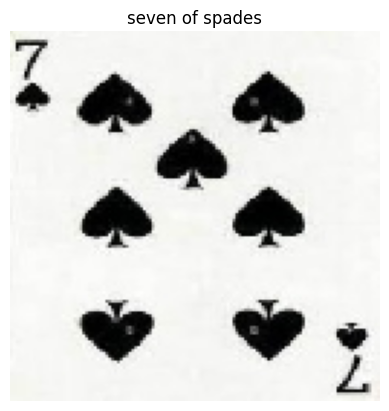

(128, 128, 3)


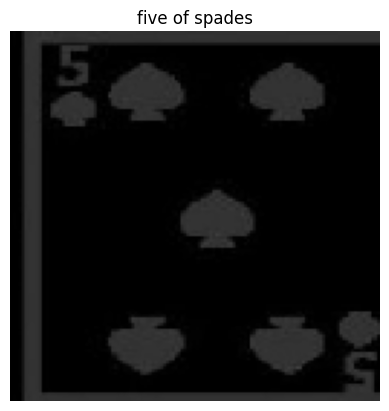

(128, 128, 3)


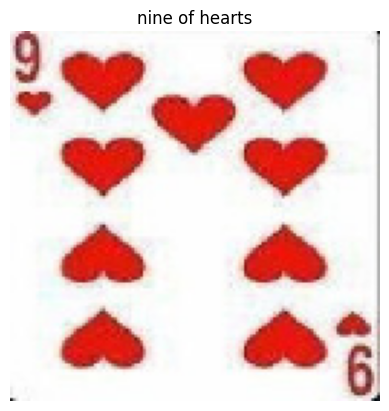

(128, 128, 3)


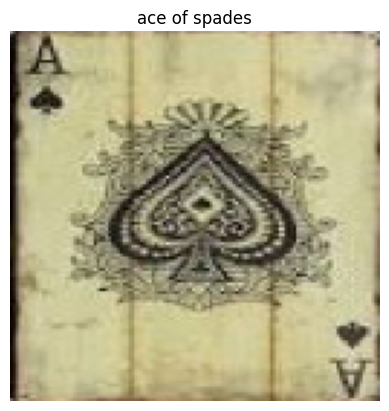

(128, 128, 3)


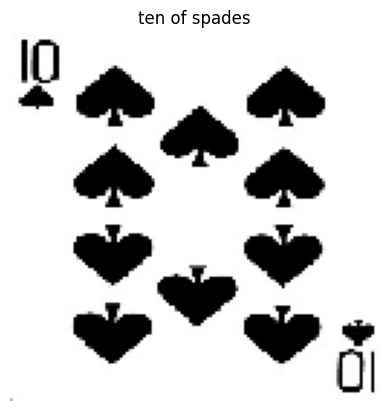

In [18]:
image, labels = sample

for i in range(5):
    print(image[i].shape)
    plt.imshow(image[i])
    active_classes = [class_names[j] for j in range(len(labels[i])) if labels[i][j] == 1]
    plt.title(active_classes[0])
    plt.axis(False)
    plt.show()

In [7]:
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, ResNet50, InceptionV3
from tensorflow.keras import layers , models
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy' , patience=5)

# **EfficientNetB0 model**

In [8]:
eff_model = EfficientNetB0(weights='imagenet' , include_top=False, input_shape = (128, 128, 3) )
eff_model.trainable = True

In [9]:
EFFmodel = models.Sequential([
    eff_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(53, activation='softmax')
])

In [10]:
EFFmodel.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
eff_model_hist = EFFmodel.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=25,
    batch_size = 100
)

Epoch 1/25
239/239 [==============================] - 158s 606ms/step - loss: 2.6174 - accuracy: 0.3158 - val_loss: 4.0936 - val_accuracy: 0.0113
Epoch 2/25
239/239 [==============================] - 144s 603ms/step - loss: 1.2817 - accuracy: 0.6524 - val_loss: 4.2683 - val_accuracy: 0.0189
Epoch 3/25
239/239 [==============================] - 146s 610ms/step - loss: 0.9258 - accuracy: 0.7503 - val_loss: 5.1379 - val_accuracy: 0.0189
Epoch 4/25
239/239 [==============================] - 146s 610ms/step - loss: 0.7300 - accuracy: 0.8048 - val_loss: 4.0267 - val_accuracy: 0.0679
Epoch 5/25
239/239 [==============================] - 153s 637ms/step - loss: 0.5821 - accuracy: 0.8467 - val_loss: 2.8866 - val_accuracy: 0.2377
Epoch 6/25
239/239 [==============================] - 150s 626ms/step - loss: 0.4889 - accuracy: 0.8696 - val_loss: 4.8398 - val_accuracy: 0.0189
Epoch 7/25
239/239 [==============================] - 149s 621ms/step - loss: 0.4479 - accuracy: 0.8800 - val_loss: 4.4357 -

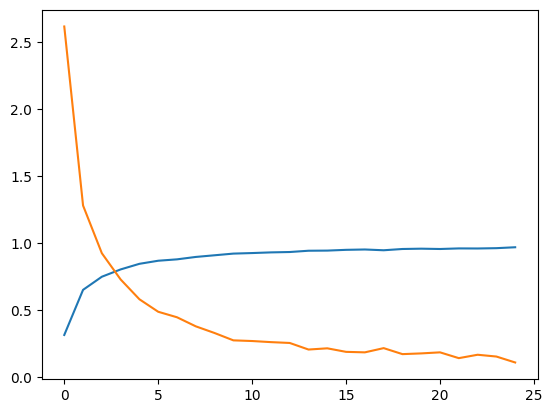

In [12]:
plt.plot(eff_model_hist.history['accuracy'])
plt.plot(eff_model_hist.history['loss'])

In [13]:
predictions = EFFmodel.predict(test_dataset)
predicted_classes = predictions.argmax(axis=-1)
true_classes = test_dataset.classes

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted_classes,true_classes)) # 15%

0.6792452830188679


In [15]:
EFFmodel.save('EFFmodel.h5')  

# **MobileNetV2 model**

In [8]:
mob_model = MobileNetV2(weights='imagenet' , include_top=False, input_shape = (128, 128, 3) )
mob_model.trainable = True

In [9]:
MOBmodel = models.Sequential([
    mob_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(53, activation='softmax')
])

In [10]:
MOBmodel.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
mob_model_hist = MOBmodel.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=30,
    batch_size = 32
)

Epoch 1/30
239/239 [==============================] - 88s 369ms/step - loss: 0.2743 - accuracy: 0.9323 - val_loss: 1.1447 - val_accuracy: 0.7472
Epoch 2/30
239/239 [==============================] - 87s 365ms/step - loss: 0.2535 - accuracy: 0.9378 - val_loss: 0.9879 - val_accuracy: 0.7962
Epoch 3/30
239/239 [==============================] - 87s 366ms/step - loss: 0.2388 - accuracy: 0.9420 - val_loss: 0.9884 - val_accuracy: 0.7849
Epoch 4/30
239/239 [==============================] - 88s 366ms/step - loss: 0.2187 - accuracy: 0.9458 - val_loss: 0.6447 - val_accuracy: 0.8453
Epoch 5/30
239/239 [==============================] - 87s 366ms/step - loss: 0.2560 - accuracy: 0.9309 - val_loss: 0.8678 - val_accuracy: 0.8151
Epoch 6/30
239/239 [==============================] - 87s 366ms/step - loss: 0.2499 - accuracy: 0.9374 - val_loss: 0.5240 - val_accuracy: 0.9019
Epoch 7/30
239/239 [==============================] - 87s 365ms/step - loss: 0.1831 - accuracy: 0.9528 - val_loss: 0.7598 - val_ac

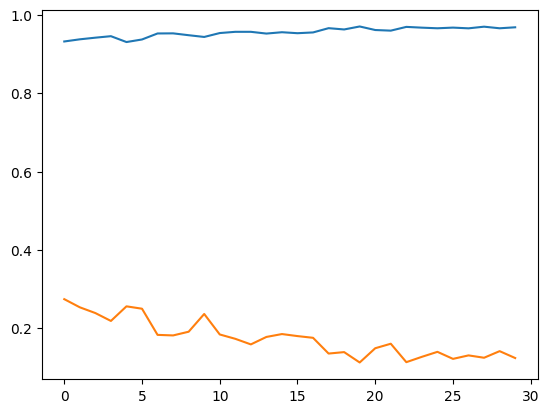

In [27]:
plt.plot(mob_model_hist.history['accuracy'])
plt.plot(mob_model_hist.history['loss'])

In [28]:
predictions = MOBmodel.predict(test_dataset)
predicted_classes = predictions.argmax(axis=-1)
true_classes = test_dataset.classes

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted_classes,true_classes)) # 85%

0.9132075471698113


In [31]:
MOBmodel.save('MOBmodel.h5')

# **InceptionV3 model**

In [16]:
inc_model = InceptionV3(weights='imagenet' , include_top=False, input_shape = (128, 128, 3) )
inc_model.trainable = True

In [17]:
INCmodel = models.Sequential([
    inc_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(53, activation='softmax')
])

In [18]:
INCmodel.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
inc_model_hist = INCmodel.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=30,
    batch_size = 32
)

Epoch 1/30
239/239 [==============================] - 179s 669ms/step - loss: 3.4218 - accuracy: 0.1118 - val_loss: 36.5408 - val_accuracy: 0.0755
Epoch 2/30
239/239 [==============================] - 152s 635ms/step - loss: 2.5453 - accuracy: 0.2740 - val_loss: 1.7078 - val_accuracy: 0.3811
Epoch 3/30
239/239 [==============================] - 152s 634ms/step - loss: 2.0403 - accuracy: 0.3833 - val_loss: 1.4987 - val_accuracy: 0.5170
Epoch 4/30
239/239 [==============================] - 152s 634ms/step - loss: 1.7743 - accuracy: 0.4658 - val_loss: 1.6720 - val_accuracy: 0.5132
Epoch 5/30
239/239 [==============================] - 152s 634ms/step - loss: 1.5154 - accuracy: 0.5392 - val_loss: 1.0067 - val_accuracy: 0.6943
Epoch 6/30
239/239 [==============================] - 152s 634ms/step - loss: 1.3265 - accuracy: 0.6003 - val_loss: 0.6515 - val_accuracy: 0.7547
Epoch 7/30
239/239 [==============================] - 152s 635ms/step - loss: 1.1952 - accuracy: 0.6423 - val_loss: 1.2141 

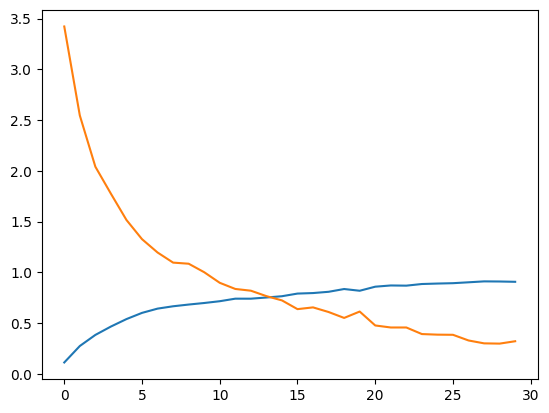

In [20]:
plt.plot(inc_model_hist.history['accuracy'])
plt.plot(inc_model_hist.history['loss'])

In [21]:
predictions = INCmodel.predict(test_dataset)
predicted_classes = predictions.argmax(axis=-1)
true_classes = test_dataset.classes

In [22]:
print(accuracy_score(predicted_classes,true_classes))

0.9169811320754717


In [30]:
INCmodel.save('INCmodel.h5')

------------

In [39]:
import numpy as np
import cv2

# Function to resize the image
def resize_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    if img is not None:
        # Ensure the image has 3 channels (RGB)
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

        resized_img = cv2.resize(img, target_size)
        resized_image = np.expand_dims(resized_img, axis=0)
        return resized_image  # Return the resized image directly
    else:
        print(f"Warning: Could not read image file: {image_path}")
        return None

# Load and resize the image
image_path = 'img.jpg'  # Make sure to set this to your actual image path
resized_image = resize_image(image_path)


In [40]:
from tensorflow.keras.models import load_model
def predict_card(image):
    try:
        # Load models
        INC = load_model('INCmodel.h5')
        MOB = load_model('MOBmodel.h5')
        EFF = load_model('EFFmodel.h5')
        print('----------------------------------------------------------------------')
        print(np.argmax(INC.predict(image)))
        print('----------------------------------------------------------------------')
        print(np.argmax(MOB.predict(image)))
        print('----------------------------------------------------------------------')
        print(np.argmax(EFF.predict(image)))
        print('----------------------------------------------------------------------')
        models = [EFF, MOB, INC]
        weights = [0.1, 0.6, 0.3]

        predictions = [model.predict(image)[0] * w for model, w in zip(models, weights)]
        combined_prediction = np.sum(predictions, axis=0)

        final_class_index = np.argmax(combined_prediction)
        return final_class_index

    except Exception as e:
        print(f"Error loading model: {e}")
        import traceback
        traceback.print_exc()
        return None


In [41]:
result = predict_card(resized_image)
result

----------------------------------------------------------------------
1
----------------------------------------------------------------------
45
----------------------------------------------------------------------
38
----------------------------------------------------------------------


45

In [24]:
label_map = train_dataset.class_indices
label_map

{'ace of clubs': 0,
 'ace of diamonds': 1,
 'ace of hearts': 2,
 'ace of spades': 3,
 'eight of clubs': 4,
 'eight of diamonds': 5,
 'eight of hearts': 6,
 'eight of spades': 7,
 'five of clubs': 8,
 'five of diamonds': 9,
 'five of hearts': 10,
 'five of spades': 11,
 'four of clubs': 12,
 'four of diamonds': 13,
 'four of hearts': 14,
 'four of spades': 15,
 'jack of clubs': 16,
 'jack of diamonds': 17,
 'jack of hearts': 18,
 'jack of spades': 19,
 'joker': 20,
 'king of clubs': 21,
 'king of diamonds': 22,
 'king of hearts': 23,
 'king of spades': 24,
 'nine of clubs': 25,
 'nine of diamonds': 26,
 'nine of hearts': 27,
 'nine of spades': 28,
 'queen of clubs': 29,
 'queen of diamonds': 30,
 'queen of hearts': 31,
 'queen of spades': 32,
 'seven of clubs': 33,
 'seven of diamonds': 34,
 'seven of hearts': 35,
 'seven of spades': 36,
 'six of clubs': 37,
 'six of diamonds': 38,
 'six of hearts': 39,
 'six of spades': 40,
 'ten of clubs': 41,
 'ten of diamonds': 42,
 'ten of hearts':

In [ ]:
for i in label_map:
    if label_map[i]== result:
        print(f'the card belongs to class {i}')